# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sabrina Marta Disa
- **Email:** sabrinamdisa@gmail.com
- **ID Dicoding:** sabrina_marta_disa

## Background
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


## Menentukan Pertanyaan Bisnis

- Apakah orang cenderung menyewa lebih banyak sepeda pada hari-hari yang cerah?
- Apakah orang cenderung menyewa lebih banyak sepeda di musim tertentu?
- Kapan jam paling ramai dan paling sepi dalam penyewaan sepeda?
- Apakah faktor-faktor seperti suhu, kelembaban, dan kecepatan angin memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda?
- Apakah terjadi peningkatan atau penurunan signifikan pada hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Menghubungkan ke Google Drive untuk mengakses direktori

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data



*   Memuat Tabel day



In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Submission/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




*   Memuat Tabel hour



In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Submission/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data



**Menilai Data day_df**





*   Mengecek Tipe Data



In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa jumlah data pada day_df lengkap atau tidak ada missing value di dalamnya. Akan tetapi, untuk kolom dteday terdapat kesalahan tipe data. Kolom dteday seharusnnya direpresentasikan dengan tipe data **datetime**, bukan **object**.



*   Memeriksa Duplikasi dan Ringkasan Parameter Statistik



In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jumlah duplikasi = 0, artinya tidak ada data yang double dan dapat dilihat bahwa tidak ada keanehan nilai pada day_df

**Menilai Data hour_df**



*   Mengecek Tipe Data


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terlihat bahwa jumlah data pada hour_df lengkap atau tidak ada missing value di dalamnya. Akan tetapi, untuk kolom dteday terdapat kesalahan tipe data. Kolom dteday seharusnnya direpresentasikan dengan tipe data **datetime**, bukan **object**.



*   Memeriksa Duplikasi dan Ringkasan Parameter Statistik


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jumlah duplikasi = 0, artinya tidak ada data yang double dan dapat dilihat bahwa tidak ada keanehan nilai pada hour_df

### Cleaning Data

**Membersihkan Data day_df**



*   Mengubah Tipe Data


In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat bahwa tipe data pada column dteday sudah berubah menjadi **datetime**



*   Mengubah Judul dan Isi Kolom


Mengubah judul dan isi kolom berdasarkan dataset characteristics agar data lebih mudah dibaca

In [10]:
# Mengubah Judul Kolom
day_df.rename(columns={
    "instant": "index",
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

# Mengubah isi kolom yang berupa angka menjadi keterangan
month_mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Sep", 12: "Dec"}
day_df["month"] = day_df["month"].map(month_mapping)

weather_mapping = {1: "Clear/Few Clouds", 2: "Misty/Cloudy",
                   3: "Light Snow/Light Rain", 4: "Heavy Rain/Ice Pallets"}
day_df["weather"] = day_df["weather"].map(weather_mapping)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_mapping)

weekday_mapping = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
day_df["weekday"] = day_df["weekday"].map(weekday_mapping)

workingday_mapping = {0: "holiday", 1: "weekday"}
day_df["workingday"] = day_df["workingday"].map(workingday_mapping)

year_mapping = {0: "2011", 1: "2012"}
day_df["year"] = day_df["year"].map(year_mapping)

day_df.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,weekday,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,weekday,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,weekday,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membersihkan Data hour_df**



*   Mengubah Tipe Data


In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Terlihat bahwa tipe data pada column dteday sudah berubah menjadi **datetime**



*   Mengubah Judul dan Isi Kolom



Mengubah judul dan isi kolom berdasarkan dataset characteristics agar data lebih mudah dibaca

In [12]:
# Mengubah Judul Kolom
hour_df.rename(columns={
    "instant": "index",
    "dteday": "date",
    "hr": "hour",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

# Mengubah isi kolom yang berupa angka menjadi keterangan
month_mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Sep", 12: "Dec"}
hour_df["month"] = hour_df["month"].map(month_mapping)

weather_mapping = {1: "Clear/Few Clouds", 2: "Misty/Cloudy",
                   3: "Light Snow/Light Rain", 4: "Heavy Rain/Ice Pallets"}
hour_df["weather"] = hour_df["weather"].map(weather_mapping)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df["season"] = hour_df["season"].map(season_mapping)

weekday_mapping = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)

workingday_mapping = {0: "holiday", 1: "weekday"}
hour_df["workingday"] = hour_df["workingday"].map(workingday_mapping)

year_mapping = {0: "2011", 1: "2012"}
hour_df["year"] = hour_df["year"].map(year_mapping)

hour_mapping = {0: "00:00", 1: "01:00", 2: "02:00", 3: "03:00", 4: "04:00", 5: "05:00",
                6: "06:00", 7: "07:00", 8: "08:00", 9: "09:00", 10: "10:00", 11: "11:00",
                12: "12:00", 13: "13:00", 14: "14:00", 15: "15:00", 16: "16:00", 17: "17:00",
                18: "18:00", 19: "19:00", 20: "20:00", 21: "21:00", 22: "22:00", 23: "23:00"}
hour_df["hour"] = hour_df["hour"].map(hour_mapping)

hour_df.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,00:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,01:00,0,Sat,holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,02:00,0,Sat,holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,03:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,04:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data day_df



*   Demografi penyewa sepeda berdasarkan musim


In [13]:
day_df.groupby(by="season").agg({
    "count": ["max", "min", "mean", "sum"]
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Berdasarlan pivot table diatas, dapat diketahui bahwa musim **gugur/fall** memiliki rata-rata dan jumlah penyewa sepeda **terbanyak**, sedangkan musim **semi/spring** memiliki rata-rata dan jumlah penyewa sepeda paling **sedikit**



*   Demografi penyewa sepeda berdasarkan keadaan cuaca


In [14]:
day_df.groupby(by="weather").agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
                        max  min         mean      sum
weather                                               
Clear/Few Clouds       8714  431  4876.786177  2257952
Light Snow/Light Rain  4639   22  1803.285714    37869
Misty/Cloudy           8362  605  4035.862348   996858

Berdasarkan pivot table diatas, dapat diketahui bahwa cuaca cerah/sedikit berawan memiliki rata-rata dan jumlah penyewa sepeda terbanyak, sedangkan pada cuaca salju/hujan rata-rata dan jumlah penyewa sepeda cenderung sedikit.



*   Demografi penyewa sepeda berdasarkan hari libur

In [15]:
day_df.groupby(by="workingday").agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
             max  min         mean      sum
workingday                                 
holiday     8714  605  4330.168831  1000269
weekday     8362   22  4584.820000  2292410

Berdasarkan pivot table diatas, dapat diketahui bahwa pada hari libur rata-rata dan jumlah penyewa sepeda cenderung sedikit dibandingkan dengan hari-hari biasa



*   Mengelompokkan temp, hum, dan windspeed berdasarkan season

In [16]:
day_df.groupby(by="season").agg({
    "temp": ["max", "min", "mean", "sum"],
    "hum": ["max", "min", "mean", "sum"],
    "windspeed": ["max", "min", "mean", "sum"]
})

temp                                       hum            \
             max       min      mean         sum       max       min   
season                                                                 
Fall    0.861667  0.469167  0.706309  132.786150  0.939565  0.360000   
Spring  0.572500  0.059130  0.297748   53.892306  0.948261  0.000000   
Summer  0.808333  0.253043  0.544405  100.170549  0.922500  0.254167   
Winter  0.657500  0.220833  0.422906   75.277275  0.972500  0.333478   

                             windspeed                                 
            mean         sum       max       min      mean        sum  
season                                                                 
Fall    0.633482  119.094627  0.375617  0.064071  0.172095  32.353864  
Spring  0.582903  105.505427  0.507463  0.045408  0.214537  38.831210  
Summer  0.626948  115.358493  0.388067  0.065929  0.203507  37.445312  
Winter  0.668719  119.032013  0.422275  0.022392  0.171995  30.615035

Berdasarkan pivot table diatas, dapat dilihat bahwa:
1.  Rata-rata temperatur (temp) tertinggi terjadi saat musim gugur (fall), kemudian summer, winter, dan spring.
2.  Rata-rata kelembaban (hum) tertinggi terjadi saat musim dingin (winter), kemudian fall, summer, dan spring.
3. Rata-rata kecepatan angin (windspeed) tertinggi terjadi saat musim semi (spring), kemudian summer, fall, dan winter.

### Explore Data hour_df



*   Demografi penyewa sepeda berdasarkan jam

In [17]:
hour_df.groupby(by="hour").agg({
    "count": ["max", "min", "mean", "sum"]
})

count                        
        max min        mean     sum
hour                               
00:00   283   2   53.898072   39130
01:00   168   1   33.375691   24164
02:00   132   1   22.869930   16352
03:00    79   1   11.727403    8174
04:00    28   1    6.352941    4428
05:00    66   1   19.889819   14261
06:00   213   1   76.044138   55132
07:00   596   1  212.064649  154171
08:00   839   5  359.011004  261001
09:00   426  14  219.309491  159438
10:00   539   8  173.668501  126257
11:00   663  10  208.143054  151320
12:00   776   3  253.315934  184414
13:00   760  11  253.661180  184919
14:00   750  12  240.949246  175652
15:00   750   7  251.233196  183149
16:00   783  11  311.983562  227748
17:00   976  15  461.452055  336860
18:00   977  23  425.510989  309772
19:00   743  11  311.523352  226789
20:00   567  11  226.030220  164550
21:00   584   6  172.314560  125445
22:00   502   9  131.335165   95612
23:00   256   2   87.831044   63941

Berdasarkan pivot table diatas, dapat dilihat bahwa rata-rata dan jumlah penyewa sepeda paling banyak saat pukul 17:00, sedangkan rata-rata dan jumlah penyewa paling sedikit saat pukul 04:00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah orang cenderung menyewa lebih banyak sepeda pada hari-hari yang cerah?

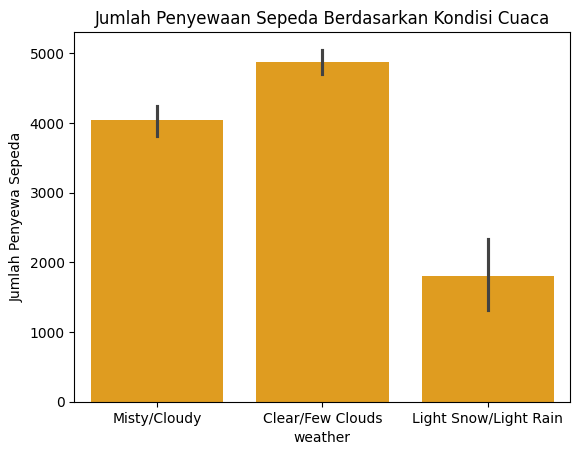

In [18]:
sns.barplot(y=day_df["count"], x=day_df["weather"], orient="v", color='orange')
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

Berdasarkan visualisasi data menggunakan bar chart diatas, dapat dilihat bahwa benar orang-orang cenderung lebih banyak menyewa sepeda pada saat kondisi cuaca sedang cerah/sedikit berawan.

### Pertanyaan 2: Apakah orang cenderung menyewa lebih banyak sepeda di musim tertentu?

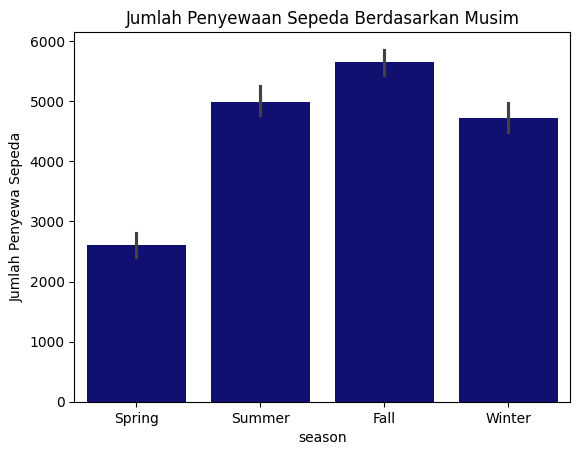

In [19]:
sns.barplot(y=day_df["count"], x=day_df["season"], orient="v", color='navy')
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

Berdasarkan visualisasi data menggunakan boxplot diatas, dapat dilihat bahwa benar orang-orang cenderung lebih banyak menyewa sepeda pada saat musim tertentu, tepatnya saat musim gugur (fall).

### Pertanyaan 3: Kapan jam paling ramai dan paling sepi dalam penyewaan sepeda?

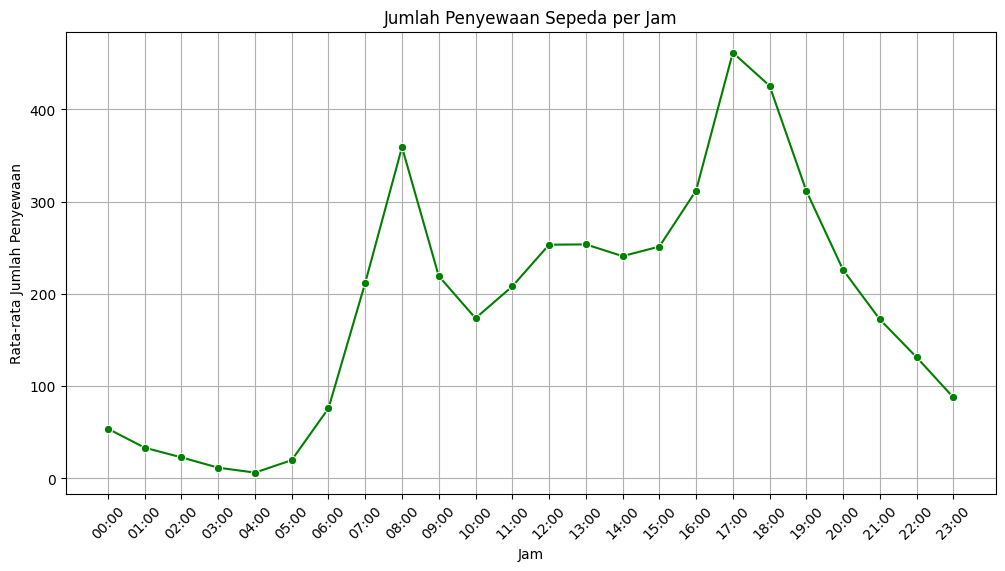

In [20]:
hourly_counts = hour_df.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=hourly_counts, marker='o', color='green')

plt.title("Jumlah Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Berdasarkan visualisasi data menggunakan line plot diatas, dapat dilihat bahwa titik tertinggi penyewaan sepeda terjadi pada pukul 17:00 dan berada di titik terendah saat pukul 04:00.

### Pertanyaan 4: Apakah faktor-faktor seperti suhu, kelembaban, dan kecepatan angin memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda?

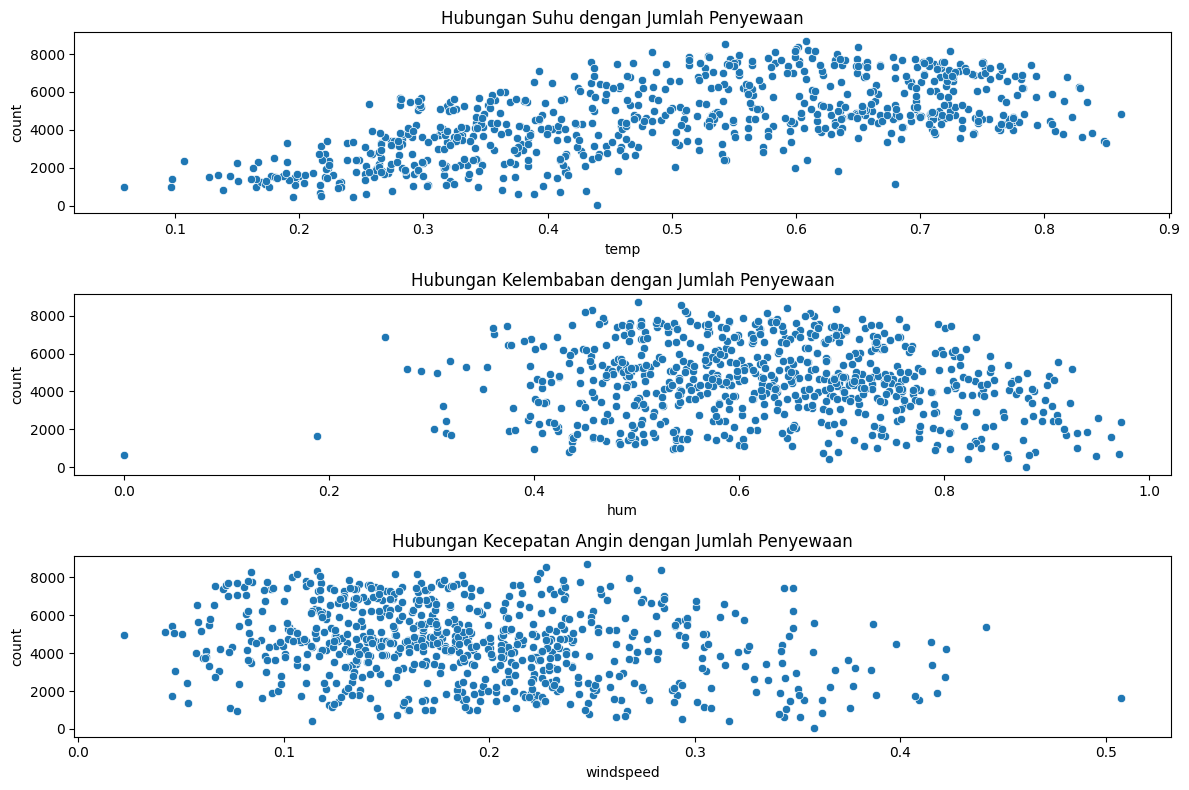

In [21]:
plt.figure(figsize=(12,8))

# Scatter plot temp vs count
plt.subplot(3, 1, 1)
sns.scatterplot(x='temp', y='count', data=day_df)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan')

# Scatter plot hum vs count
plt.subplot(3, 1, 2)
sns.scatterplot(x='hum', y='count', data=day_df)
plt.title('Hubungan Kelembaban dengan Jumlah Penyewaan')

# Scatter plot windspeed vs count
plt.subplot(3, 1, 3)
sns.scatterplot(x='windspeed', y='count', data=day_df)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Penyewaan')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan scatter plot diatas, dapat dilihat bahwa:
1.  Nilai korelasi **positif** menunjukkan adanya hubungan **positif** antara **suhu (temp)** dan **jumlah penyewa sepeda (count)**. Saat suhu naik, jumlah penyewaan sepeda cenderung meningkat.
2. Nilai korelasi **negatif** menunjukkan adanya hubungan **negatif** antara **kelembaban (hum)** dan **jumlah penyewa sepeda (count)**. Saat kelembaban naik, penyewa sepeda cenderung menurun.
3. Nilai korelasi mendekati 0 menunjukkan bahwa **kecepatan angin (windspeed)** **tidak** memiliki pengaruh signifikan terhadap **jumlah penyewa sepeda (count).**

### Pertanyaan 5: Apakah terjadi peningkatan atau penurunan signifikan pada hari libur?

<ipython-input-22-c8e98da6157f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='count', data=day_df, ci=None, palette='viridis')
<ipython-input-22-c8e98da6157f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='count', data=day_df, ci=None, palette='viridis')


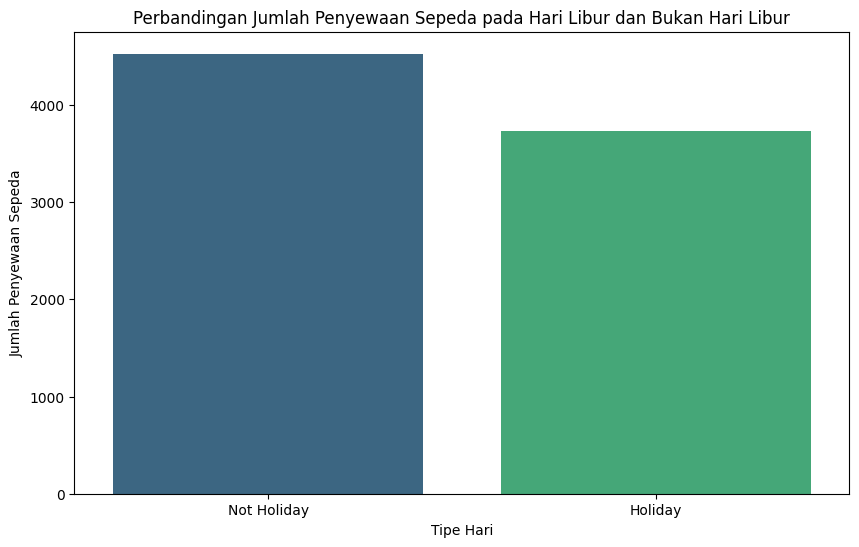

In [22]:
day_df['holiday'] = day_df['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=day_df, ci=None, palette='viridis')

plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan bar plot diatas, dapat dilihat bahwa jumlah penyewa sepeda pada hari-hari biasa (not holiday) cederung lebih banyak dibandingkan dengan hari libur (holiday).

## Conclusion

- Conclution pertanyaan 1: Berdasarkan visualisasi bar plot, didapatkan beberapa kesimpulan terkait dengan jumlah penyewaan sepeda pada hari-hari dengan kondisi cuaca yang berbeda, antara lain: Faktor cuaca berpotensi memengaruhi keputusan untuk menyewa sepeda, dapat dilihat di visualisasi bar plot, orang cenderung lebih banyak menyewa sepeda pada hari-hari dengan cuaca cerah (clear/few clouds), dan jumlah penyewaan sepeda cenderung menurun pada saat cuaca menjadi misty/cloudy atau light snow/rain.

- Conclution pertanyaan 2: Berdasarkan visualisasi bar plot, dapat disimpulkan bahwa: lebih banyak orang yang menyewa sepeda selama musim gugur dan musim panas, dimana kondisi cenderung lebih hangat dan nyaman. Sedangkan pada musim dingin penyewaan cenderung menurun, dan paling rendah selama musim semi.

- Conclution pertanyaan 3: Berdasarkan visualisasi line plot, didapatkan beberapa kesimpulan terkait dengan waktu penyewaan sepeda, antara lain: Jumlah penyewaan sepeda tertinggi terjadi pada waktu yang umumnya terkait dengan kegiatan harian, seperti pergi bekerja atau pulang kerja, yaitu sekitar jam 08:00 - 17:00. Kemudian, waktu dini hari (00:00 - 05:00) menunjukkan jumlah penyewaan yang rendah.

- Conclution pertanyaan 4: Berdasarkan visualisasi scatter plot, didapatkan beberapa kesimpulan terkait hubungan antara suhu, kelembaban, dan kecepatan angin dengan jumlah penyewaan sepeda, antara lain:  Suhu memiliki pengaruh yang positif terhadap jumlah penyewaan sepeda, sementara kelembaban memiliki pengaruh yang negatif meskipun tidak begitu kuat. Lalu, kecepatan angin tidak menunjukkan pengaruh yang jelas terhadap jumlah penyewaan sepeda berdasarkan visualisasi ini.

- Conclution pertanyaan 5: Berdasarkan visualisasi bar plot, didapatkan beberapa kesimpulan terkait dengan perbandingan jumlah penyewaan sepeda pada hari libur dan hari biasa, antara lain: Terdapat perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari libur dan hari biasa. Pada hari biasa, orang cenderung lebih banyak menyewa sepeda dibandingkan dengan hari libur.








In [23]:
day_df.to_csv("all_data.csv", index=False)
hour_df.to_csv("all_data.csv", index=False)